## Welcome to the Data Science & Analytics takehome exam. Please submit answers using this Jupyter notebook. Please email zipped files to emi.nakatsugawa@dowjones.com within three days of receiving the exam.

# Scenario

Imagine our team is helping design a campaign to target attendees of the upcoming SXSW festival in 2019. The team would like to better understand website traffic during the most recent SXSW festival (March 2018) to inform what type of content to promote in 2019.

The data in data.csv is a sample of website traffic to wsj.com from first-time visitors who are non-subscribers in the Austin, Texas area (based on IP address).

The objective is to identify which content will turn first-time visitors into loyal readers and subscribers.

<b>Note: Each row in data.csv represents a single page view.</b>
***

# Data

| Column Name	| Description |
|---------------|-------------|
|customerID	|unique customer ID|
|firstVisitDate|	Date and time of customer's first visit|
|secondVisitDate|	Date and time of customer's second visit, if any|
|articleID|	unique ID of the article read on the customer's the first visit|
|section|	section of the article read on the first visit|
|author	|author(s) of the article read on the first visit|
|headline	|headline of the article read on the first visit|
|topicKeywords|	topic keywords in article read on the first visit|
|totalVisits	|the customer's total visits to-date since firstVisitDate|
|wordCount|	word count of the customer's first article|
|videoCount	|number of videos in article|

***

# Questions

### 1. What percent of customers returned after the first visit?

In [124]:
#import necessary libraries and packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [125]:
#reading the datset
data = pd.read_csv('/content/data.csv')
#skim the dataset how it is
data.head()

,customerID,firstVisitDate,secondVisitDate,articleID,section,author,headline,topicKeywords,totalVisits,wordCount,videoCount
0,0,2018-03-13 08:41:28 UTC,2018-04-14 00:00:00 UTC,SB11210326209662973945104584092013974171076,WSJ_Business,Theo+Francis,WSJ_Article_Business_Are You Underpaid? In a F...,ceo|ceo to median pay ratio|compensation|dariu...,3,1269.0,0.0
1,1,2018-03-14 08:21:54 UTC,NaN,SB11704195083378974371404584099570957708050,WSJ_Business,Paul Ziobro,WSJ_Article_Business_Drones Are Watching: Rail...,data|drone|drones|employee|employer|employers|...,1,917.0,0.0
2,2,2018-03-13 06:18:59 UTC,NaN,SB12775101498795324251604584089331231148204,WSJ_Opinion,Francesco Ronchi,WSJ_Article_Commentary (U.S.)_Italian Voters D...,5-star movement| election|italy| populism| the...,1,895.0,0.0
3,3,2018-03-15 14:18:43 UTC,NaN,SB11027093093037343542404584101860399949656,WSJ_Business,Tim+Higgins,WSJ_Article_Autos_Tesla’s Make-Or-Break Moment...,elon musk |tesla|tesla cash burn|tesla debt|te...,1,951.0,0.0
4,4,2018-03-16 12:56:19 UTC,NaN,SB11027093093037343542404584103340219066918,WSJ_Markets,Laura+Saunders,WSJ_Article_Tax Report_Do You Own Bitcoin? The...,asset|bitcoin|capital gains |coinbase|cryptocu...,1,903.0,1.0


In [126]:
#number of firstVisit
firstVisit = data['firstVisitDate'].count()
print('Number of first time visit to the article :',firstVisit)
#checking if there is null values
checkna=data['firstVisitDate'].isna().sum()
print('checking null values in first visit :',checkna)
#how many people coming back from firstVisit
secondVisit = data['secondVisitDate'].count()
print('Number of second time visit to the article :',secondVisit)
#percent of customers returned after the first visit?
perc = (secondVisit/firstVisit)*100
print('Percentage of customers returned after first visit : ',round(perc),'%')

Number of first time visit to the article : 10000
checking null values in first visit : 0
Number of second time visit to the article : 1203
Percentage of customers returned after first visit :  12 %


### 2. What are the top three best-performing stories in each section, by pageviews?

In [127]:
#group by sections and calculate their total
groupBysec = data.groupby(by=['section'], as_index=False)['totalVisits'].sum()
print('Total number of page views by sections')
print(groupBysec)

Total number of page views by sections
        section  totalVisits
0  WSJ_Business         3494
1      WSJ_Life         1827
2   WSJ_Markets         1285
3   WSJ_Opinion         1577
4  WSJ_Politics         5096
5      WSJ_Tech          961


In [128]:
#  Top three best-performing stories in each section, by pageviews
for i in ['WSJ_Business','WSJ_Life','WSJ_Markets','WSJ_Opinion','WSJ_Politics','WSJ_Tech']:
    section = data[data['section']==i]
    a=section.groupby(by=['section','articleID'], as_index=False)['totalVisits'].sum().sort_values(ascending=False,by='totalVisits')[:3]
    print('Top three best-performing article in',i, 'section, by pageviews:')
    print(a)
    print()
    print('------------------------------------------------------------------------------------------------')

Top three best-performing article in WSJ_Business section, by pageviews:
          section                                    articleID  totalVisits
183  WSJ_Business  SB11704195083378974371404584097403724108802          741
77   WSJ_Business  SB11027093093037343542404584101822248659720          220
24   WSJ_Business  SB10342241267609484717704584101481939436054          183

------------------------------------------------------------------------------------------------
Top three best-performing article in WSJ_Life section, by pageviews:
      section                                    articleID  totalVisits
126  WSJ_Life  SB11513260795640254558004584085750469425772          144
145  WSJ_Life  SB11805791893646614375304584073542435430108          141
235  WSJ_Life  SB12775101498795324251604584089691304167728          135

------------------------------------------------------------------------------------------------
Top three best-performing article in WSJ_Markets section, by pageviews

### 3. Based on this data, would you choose to promote a Tech story or a Markets story on social media? Why?

In [129]:
for i in ['WSJ_Markets','WSJ_Tech']:
    section= data[data['section']==i]
    firstvisit = section['firstVisitDate'].count()
    print('Total page view in',i,'is :',firstvisit)
    secondvisit = section['secondVisitDate'].count()
    ret= (secondvisit/firstvisit)*100
    totalarticle = section['totalVisits'].sum()
    totalbysecondvisit = totalarticle/firstvisit
    print('Total visit in',i,'per firstvisit: ',totalbysecondvisit)
    print('Percentage of Customers return after the first visit in',i,'is :',ret,'%')
    print('-------------------------------------------------------------------------')

Total page view in WSJ_Markets is : 992
Total visit in WSJ_Markets per firstvisit:  1.2953629032258065
Percentage of Customers return after the first visit in WSJ_Markets is : 11.895161290322582 %
-------------------------------------------------------------------------
Total page view in WSJ_Tech is : 704
Total visit in WSJ_Tech per firstvisit:  1.3650568181818181
Percentage of Customers return after the first visit in WSJ_Tech is : 10.511363636363637 %
-------------------------------------------------------------------------


**We would choose to promote Market story because Percentage of Customers return after the first visit in WSJ_Markets is more than WSJ_Tech**.

### 4. Create a visualization exploring the relationship between any of the content characteristics (such as section, author, keywords etc...) and returning visitors. This is an open-ended task. Briefly describe the visualization and the insight.

WordCloud of author


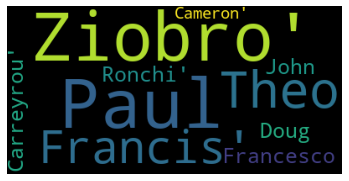

WordCloud of headline


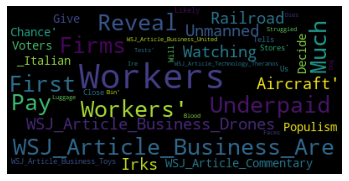

WordCloud of topicKeywords


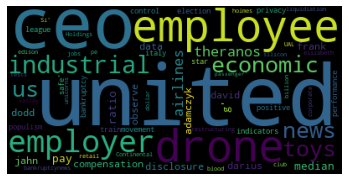

In [130]:
# WordCloud : Most common words
for i in ['author','headline','topicKeywords']:
    text = data[i].values
    wordcloud = WordCloud().generate(str(text))
    print('WordCloud of',i)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

Average by section
        section    wordCount
0  WSJ_Business  1076.910622
1      WSJ_Life  1696.424747
2   WSJ_Markets   956.795941
3   WSJ_Opinion   783.321081
4  WSJ_Politics   908.654148
5      WSJ_Tech   987.026034


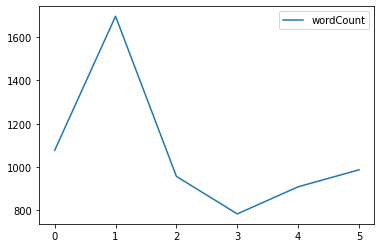

---------------------------------------------------------
Average by section
        section  videoCount
0  WSJ_Business    0.460708
1      WSJ_Life    0.078871
2   WSJ_Markets    0.202931
3   WSJ_Opinion    0.002162
4  WSJ_Politics    0.319942
5      WSJ_Tech    1.194487


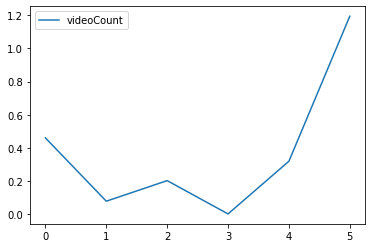

---------------------------------------------------------
Average by section
        section  totalVisits
0  WSJ_Business     1.446791
1      WSJ_Life     1.253946
2   WSJ_Markets     1.295363
3   WSJ_Opinion     1.619097
4  WSJ_Politics     1.473684
5      WSJ_Tech     1.365057


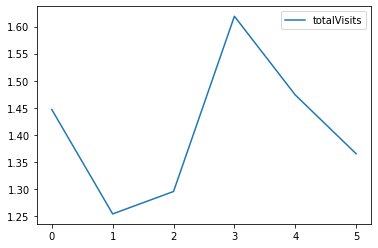

---------------------------------------------------------


In [131]:
#How each section performed based on wordCount,videoCount and pageviews
for i in ['wordCount','videoCount','totalVisits']:
    a=data.groupby(by=['section'], as_index=False)[i].mean()
    print('Average by section')
    print(a)
    a.plot()
    plt.show()
    print('---------------------------------------------------------')

Top VideoCount of WSJ_Business


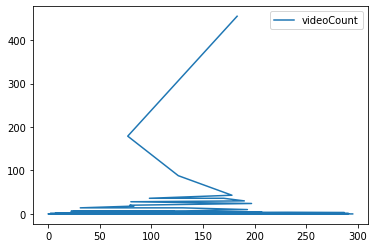

Number of videos that lead to second visit in the article of WSJ_Business


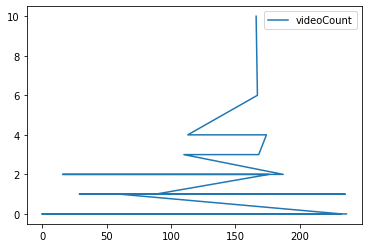

Top VideoCount of WSJ_Life


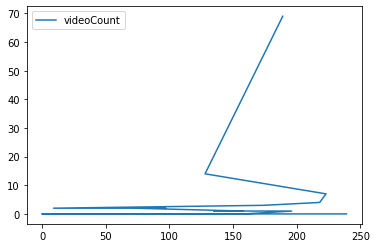

Number of videos that lead to second visit in the article of WSJ_Life


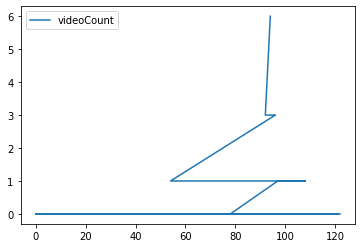

Top VideoCount of WSJ_Markets


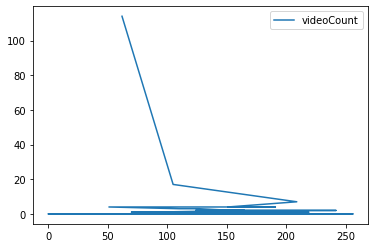

Number of videos that lead to second visit in the article of WSJ_Markets


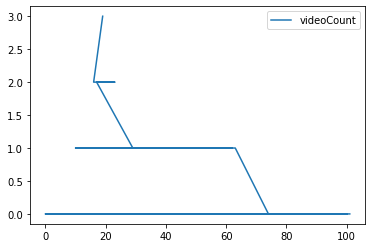

Top VideoCount of WSJ_Opinion


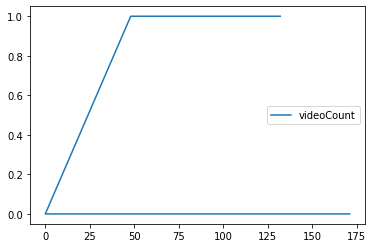

Number of videos that lead to second visit in the article of WSJ_Opinion


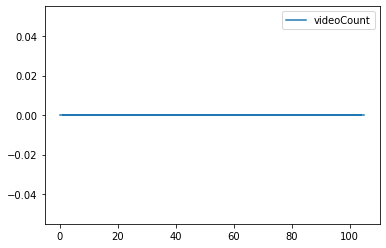

Top VideoCount of WSJ_Politics


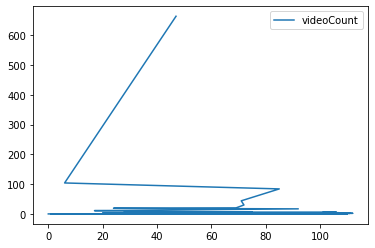

Number of videos that lead to second visit in the article of WSJ_Politics


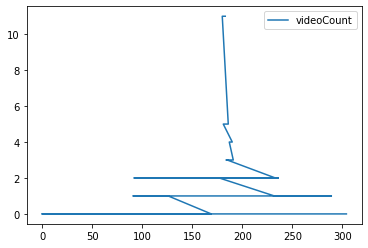

Top VideoCount of WSJ_Tech


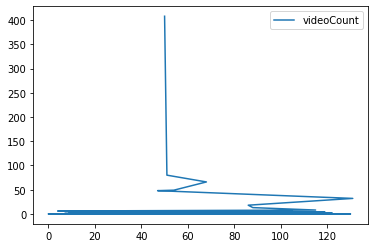

Number of videos that lead to second visit in the article of WSJ_Tech


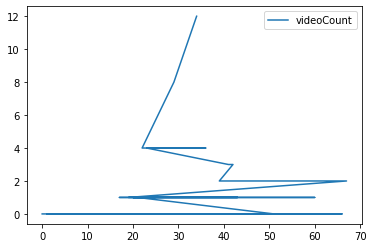

In [132]:
# Tech, Business and Politics have high video counts in a article and customer visit second time with max around 10 video counts
for i in ['WSJ_Business','WSJ_Life','WSJ_Markets','WSJ_Opinion','WSJ_Politics','WSJ_Tech']:
    section=data[data['section']==i]
    a=section.groupby(by=['articleID'], as_index=False)['videoCount'].sum().sort_values(ascending=False,by='videoCount')
    print('Top VideoCount of',i)
    #print(a)
    a.plot()
    plt.show()
    b=section.groupby(by=['articleID','secondVisitDate'], as_index=False)['videoCount'].sum().sort_values(ascending=False,by='videoCount')
    #print(b)
    print('Number of videos that lead to second visit in the article of',i)
    b.plot()
    plt.show()

**Tech, Business and Politics have high video counts in a article and customer visit second time with max around 10 video counts**

section
WSJ_Business    293
WSJ_Life        135
WSJ_Markets     118
WSJ_Opinion     115
WSJ_Politics    468
WSJ_Tech         74
Name: secondVisitDate, dtype: int64


(<matplotlib.axes._subplots.AxesSubplot at 0x7f40eedadb10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f40eedadb10>)

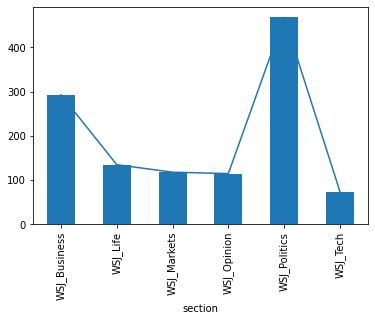

In [133]:
# Second visit section numbers
sa=data.groupby('section')['secondVisitDate'].count()
print(sa)
sa.plot(), sa.plot.bar()

In [134]:
# Date time
#The difference between firstvisit and secondvist : mean and median
dateee= data[data.secondVisitDate.notnull()]
dateee.firstVisitDate = pd.to_datetime(dateee.firstVisitDate)
dateee.secondVisitDate = pd.to_datetime(dateee.secondVisitDate)
diff = dateee['firstVisitDate'] - dateee['secondVisitDate']
print('diff mean : ' ,diff.mean())
print('diff median :',diff.median())

diff mean :  -31 days +23:23:42.304239402
diff median : -17 days +13:30:25


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


**WSJ Politics have more pageviews but WSJ_Opinion have more page views per article.**

### 5. Create a simple model predicting the likelihood of a first-time visitor returning.

In [135]:
#Creating insightful information about the authors before doing the data manipulation to build the model
data['secondVisitDate'] = data['secondVisitDate'].fillna(0)
data['secondVisitDate'] = np.where(data['secondVisitDate']!=0, 1, 0)
data['firstVisitDate']=1
one_hot = pd.get_dummies(data['section'])
data = data.drop('section',axis = 1)
data = data.join(one_hot)
data['author'] = data['author'].str.replace("+",",")
data['author'] = data['author'].str.replace(","," ")


In [136]:
print("MOST NUMBER OF FIRST VISITS ARTICLE AUTHORS")
s=data.groupby('author')['secondVisitDate'].count()
s=s.sort_values(ascending=False)
print(s)

MOST NUMBER OF FIRST VISITS ARTICLE AUTHORS
author
Michael C. Bender                               1137
Khadeeja Safdar                                  565
Rebecca Ballhaus|Peter Nicholas                  553
Michael C. Bender|Rebecca Ballhaus               342
The Editorial Board                              301
                                                ... 
Kate O’Keeffe|Alexandra Berzon|Chris Kirkham       1
Kathleen A. Hughes                                 1
Kathryn O’Shea-Evans                               1
Katy Stech                                         1
Kari Paul                                          1
Name: secondVisitDate, Length: 688, dtype: int64


In [137]:
print("MOST NUMBER OF SECOND VISITS ARTICLE AUTHORS")
aurthorWithsecond=data[data['secondVisitDate']==1]
ca=aurthorWithsecond.groupby('author')['secondVisitDate'].count()
ca.sort_values(ascending=False)

MOST NUMBER OF SECOND VISITS ARTICLE AUTHORS


author
Michael C. Bender                     156
Khadeeja Safdar                        80
Rebecca Ballhaus|Peter Nicholas        77
Michael C. Bender|Rebecca Ballhaus     50
The Editorial Board                    35
                                     ... 
Mark Hulbert                            1
Maureen Farrell|Austen Hufford          1
Maureen Farrell|Jay Greene              1
Melanie Evans|Laura Stevens             1
Aaron Back                              1
Name: secondVisitDate, Length: 239, dtype: int64

In [138]:
#One hot encoding for authors to fit the model
one_hot = pd.get_dummies(data['author'])
data = data.drop('author',axis = 1)
data = data.join(one_hot)

In [139]:
#Drop customerID,articleID as they are  not useful features and other sentences features are also droped
data.drop(['customerID', 'articleID','headline','topicKeywords'], axis = 1,inplace=True)

In [140]:
#Fill null in wordCount , videoCount with 0. We can also try with median
data['wordCount'] = data['wordCount'].fillna(0)
data['videoCount'] = data['videoCount'].fillna(0)

In [141]:
#checking null value in the dataset
data.isna().sum()

firstVisitDate                  0
secondVisitDate                 0
totalVisits                     0
wordCount                       0
videoCount                      0
                               ..
Yoree Koh|Rachel Feintzeig      0
Yuka Hayashi                    0
Zeke Turner                     0
Zeke Turner|Julie Jargon        0
Zeke Turner|Natalia Drozdiak    0
Length: 699, dtype: int64

In [142]:
#Features and target variable
#&-% training and 30%testing
X = data.loc[:, data.columns != 'secondVisitDate']
y = data.loc[:, data.columns == 'secondVisitDate']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [143]:
#logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [144]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = logreg.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2640    0]
 [   0  360]]


In [147]:
data['secondVisitDate'].value_counts()

0    8797
1    1203
Name: secondVisitDate, dtype: int64

**It is an imbalanced dataset and we should use SMOTE for balancing the dataset.We should use metrics such as F1-score,ROC etc to evaluate the model.**

### 6. What additional data would you add to improve the model? (Answer in 3-5 sentences)

To improve the model we should requst for other location data to see insight.

Any outlier or significant events happened on a particular day that might affect the pageview of the article.

Date when the article is pubished.If it is end of the month or at the beginning. 

### 7. What other interesting stories can you tell with this data?

**Difference between the first visit and second visit of the customers**

difference mean :  -31 days +23:23:42.304239402

difference median : -17 days +13:30:25

**Top five authors with second visit by customers**

author

Michael C. Bender                     156

Khadeeja Safdar                        80

Rebecca Ballhaus|Peter Nicholas        77

Michael C. Bender|Rebecca Ballhaus     50

The Editorial Board                    35

In [145]:
#Code of other interesting stories can be find in the above cells